In [31]:
import joblib
import shap

In [32]:
data_rf = joblib.load("../experiments/random_forest/shap_rf.pkl")
shap_values_rf = data_rf["shap_values"]
X_test_rf = data_rf["X_test"]
features_rf = data_rf["features"]

data_mlp = joblib.load("../experiments/mlp/shap_mlp.pkl")
shap_values_mlp = data_mlp["shap_values"]
X_test_mlp = data_mlp["X_test"]
features_mlp = data_mlp["features"]

data_lgbm = joblib.load("../experiments/light_gbm/shap_lightgbm.pkl")
shap_values_lgbm = data_lgbm["shap_values"]
X_test_lgbm = data_lgbm["X_test"]
features_lgbm = data_lgbm["features"]

In [33]:
import numpy as np
import pandas as pd

# Exemplo com médias de SHAP
mean_rf = np.abs(shap_values_rf).mean(axis=0)
mean_mlp = np.abs(shap_values_mlp).mean(axis=0)
mean_lgbm = np.abs(shap_values_lgbm).mean(axis=0)

df_shap_mean = pd.DataFrame({
    "feature": data_rf["features"],
    "rf": mean_rf,
    "mlp": mean_mlp,
    "lgbm": mean_lgbm,
}).set_index("feature")

# Correlação de Spearman entre os rankings
print(df_shap_mean.corr(method="spearman"))

            rf       mlp      lgbm
rf    1.000000  0.601421  0.913788
mlp   0.601421  1.000000  0.672655
lgbm  0.913788  0.672655  1.000000


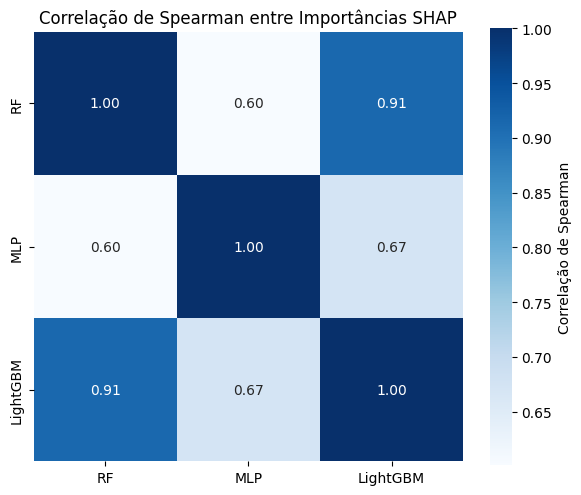

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Renomear as colunas e o índice do DataFrame
df_renomeado = df_shap_mean.rename(columns={
    "rf": "RF",
    "mlp": "MLP",
    "lgbm": "LightGBM"
})

# Calcular correlação de Spearman com os novos nomes
spearman_corr = df_renomeado.corr(method="spearman")

# Plotar o heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(
    spearman_corr,
    annot=True,
    fmt=".2f",
    cmap="Blues",
    square=True,
    cbar_kws={"label": "Correlação de Spearman"}
)
plt.title("Correlação de Spearman entre Importâncias SHAP")
plt.tight_layout()
plt.show()

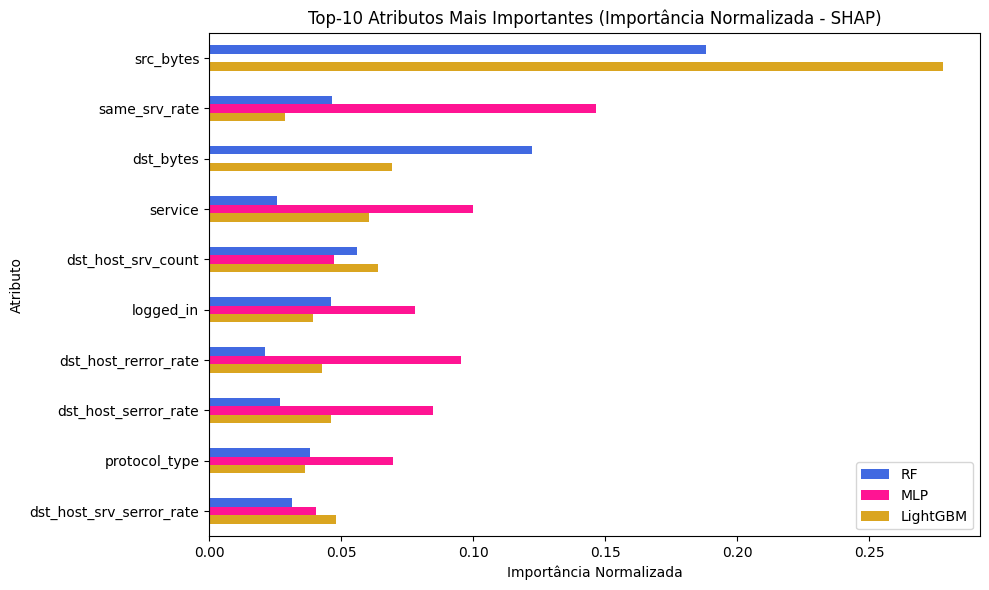

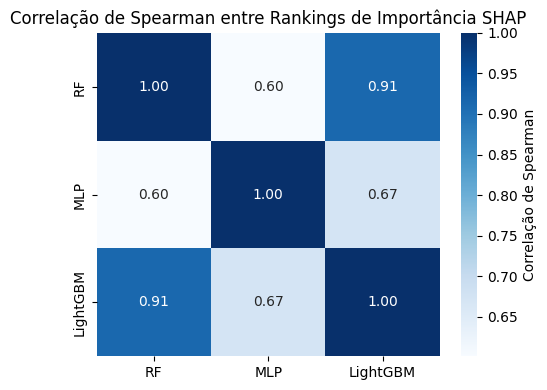

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Calcular importância média absoluta
mean_rf = np.abs(shap_values_rf).mean(axis=0)
mean_mlp = np.abs(shap_values_mlp).mean(axis=0)
mean_lgbm = np.abs(shap_values_lgbm).mean(axis=0)

# 2. Normalizar
norm_rf = mean_rf / mean_rf.sum()
norm_mlp = mean_mlp / mean_mlp.sum()
norm_lgbm = mean_lgbm / mean_lgbm.sum()

# 3. Criar DataFrame
df_norm = pd.DataFrame({
    "feature": data_rf["features"],
    "RF": norm_rf,
    "MLP": norm_mlp,
    "LightGBM": norm_lgbm
}).set_index("feature")

# 4. Calcular média para ordenar (opcional)
df_norm["mean_importance"] = df_norm.mean(axis=1)

# 5. Top-k
k = 10
topk_df = df_norm.sort_values("mean_importance", ascending=False).head(k)

# 6. Gráfico de barras agrupado
topk_df.drop(columns="mean_importance").plot(
    kind="barh",
    figsize=(10, 6),
    color=["royalblue", "deeppink", "green"]
)
plt.title(f"Top-{k} Atributos Mais Importantes (Importância Normalizada - SHAP)")
plt.xlabel("Importância Normalizada")
plt.ylabel("Atributo")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# 7. Correlação de Spearman entre rankings
ranking_df = df_norm.drop(columns="mean_importance").rank(ascending=False)
corr_spearman = ranking_df.corr(method="spearman")

# 8. Heatmap da correlação de rankings
plt.figure(figsize=(5, 4))
sns.heatmap(
    corr_spearman,
    annot=True,
    fmt=".2f",
    cmap="Blues",
    cbar_kws={"label": "Correlação de Spearman"}
)
plt.title("Correlação de Spearman entre Rankings de Importância SHAP")
plt.tight_layout()
plt.show()

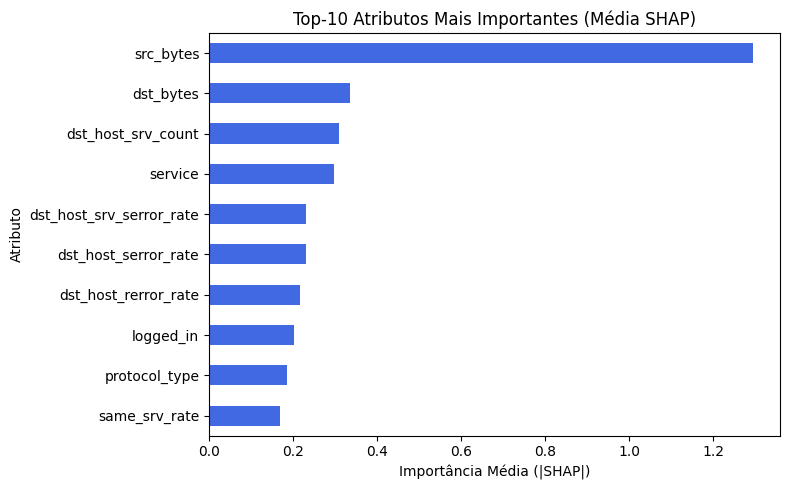

In [30]:
topk_df["mean_importance"].sort_values().plot(
    kind="barh",
    figsize=(8, 5),
    color="royalblue"
)
plt.title(f"Top-{k} Atributos Mais Importantes (Média SHAP)")
plt.xlabel("Importância Média (|SHAP|)")
plt.ylabel("Atributo")
plt.tight_layout()
plt.show()

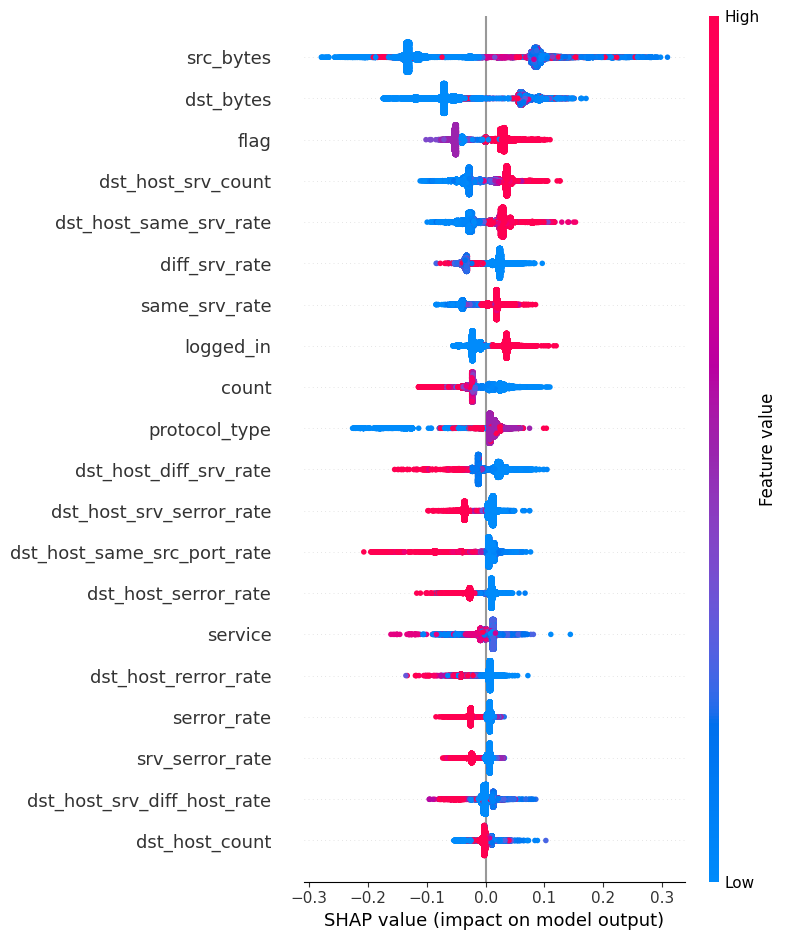

In [7]:
shap.summary_plot(shap_values_rf, X_test_rf, feature_names=features_rf)

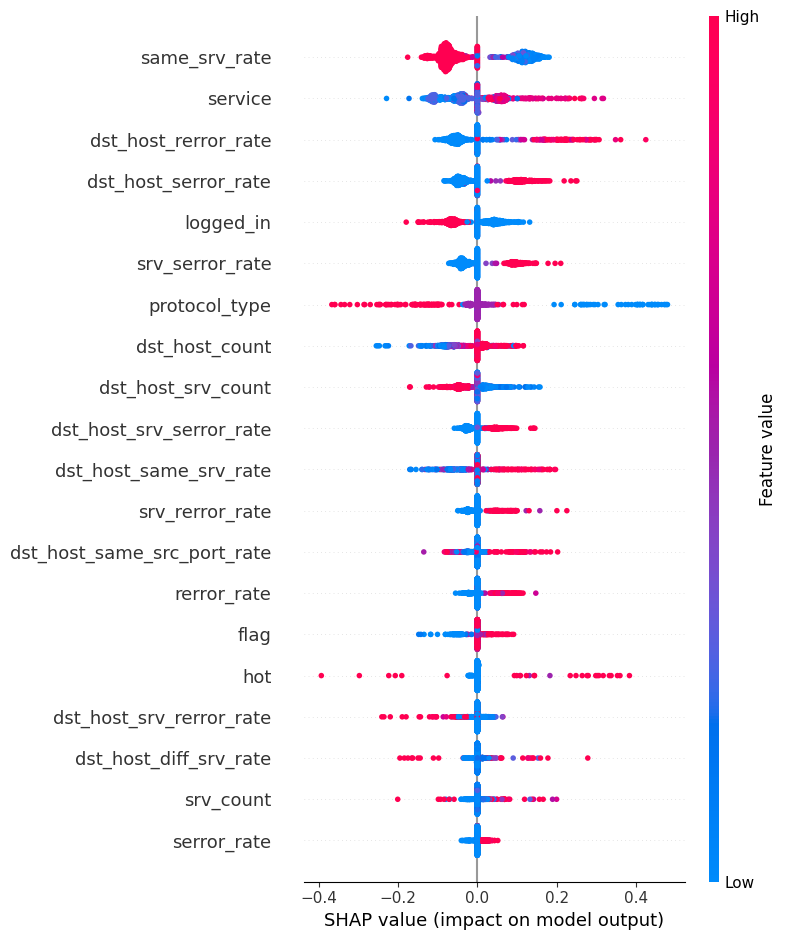

In [8]:
shap.summary_plot(shap_values_mlp, X_test_mlp[:1000], feature_names=features_mlp)

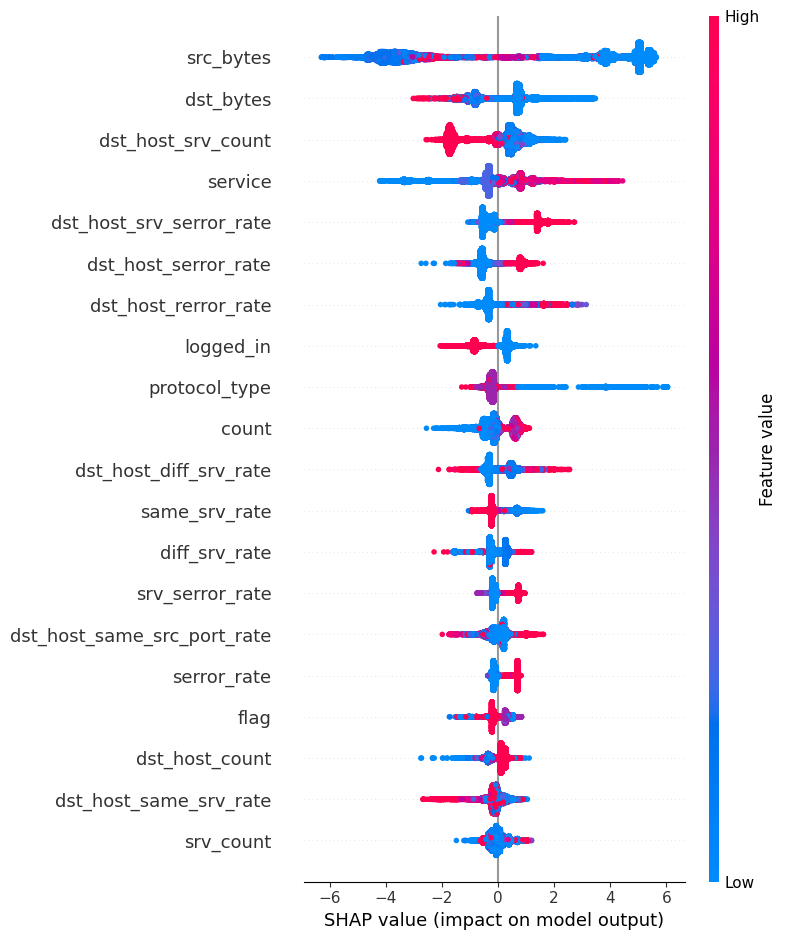

In [9]:
shap.summary_plot(shap_values_lgbm, X_test_lgbm, feature_names=features_lgbm)

In [ ]:
shap.dependence_plot(
    "srv_count",
    shap_values_rf,
    X_test_rf,
    interaction_index="src_bytes"  # cor será baseada nesse atributo
)